In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('forestfire_dataset_cleaned.csv')

In [3]:
X = data.iloc[:,:-1].values
y = data['Impact_type']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20, stratify=y)

In [5]:
clf = DecisionTreeClassifier()

In [6]:
# Train Train Train
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
y_pred = clf.predict(X_test)

In [8]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy *= 100
print(f'Accuracy: {accuracy:.2f}%')

#Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

#Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 87.50%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        93
           1       0.78      0.87      0.82        93
           2       0.96      0.87      0.92        94

    accuracy                           0.88       280
   macro avg       0.88      0.88      0.88       280
weighted avg       0.88      0.88      0.88       280

Confusion Matrix:
 [[82 11  0]
 [ 9 81  3]
 [ 0 12 82]]


[Text(0.6278334607821717, 0.9772727272727273, 'x[1] <= 22.5\ngini = 0.667\nsamples = 1117\nvalue = [372, 373, 372]\nclass = Moderate'),
 Text(0.6185114886024324, 0.9318181818181818, 'x[1] <= 9.5\ngini = 0.549\nsamples = 787\nvalue = [372, 373, 42]\nclass = Moderate'),
 Text(0.6231724746923021, 0.9545454545454546, 'True  '),
 Text(0.3238338431286869, 0.8863636363636364, 'x[1] <= 7.0\ngini = 0.451\nsamples = 557\nvalue = [372, 179, 6]\nclass = Minimal'),
 Text(0.19226567620712257, 0.8409090909090909, 'x[10] <= 7.5\ngini = 0.507\nsamples = 229\nvalue = [101.0, 125.0, 3.0]\nclass = Moderate'),
 Text(0.13283810356128467, 0.7954545454545454, 'x[1] <= 2.5\ngini = 0.471\nsamples = 147\nvalue = [94, 51, 2]\nclass = Minimal'),
 Text(0.08855873570752312, 0.75, 'x[0] <= 5.25\ngini = 0.357\nsamples = 122\nvalue = [94, 27, 1]\nclass = Minimal'),
 Text(0.03728788871895711, 0.7045454545454546, 'x[2] <= 0.07\ngini = 0.163\nsamples = 79\nvalue = [72, 6, 1]\nclass = Minimal'),
 Text(0.018643944359478554,

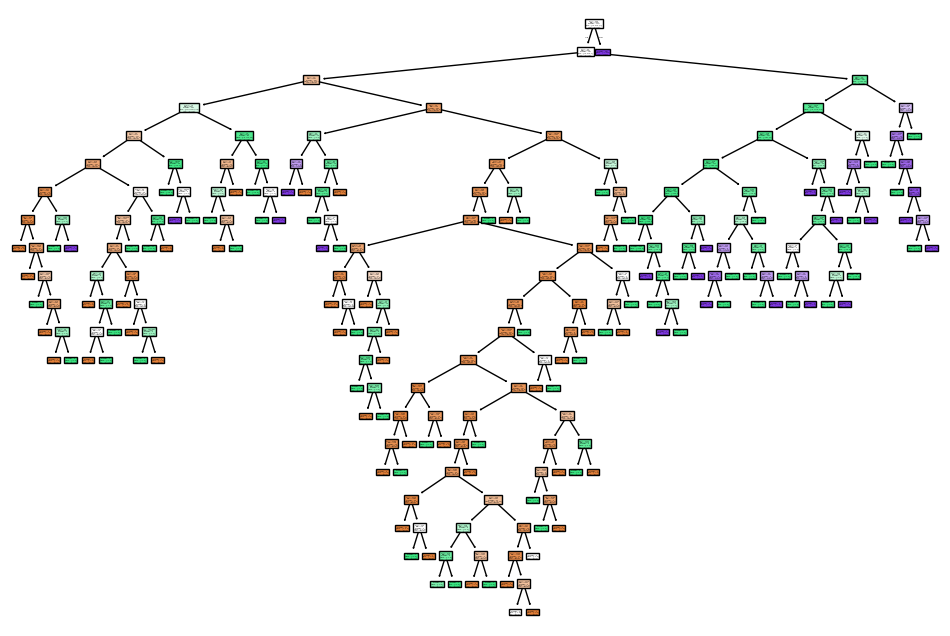

In [9]:
# Plot the Tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, class_names=['Minimal', 'Moderate', 'Severe'])

In [11]:
from sklearn import tree

text_representation = tree.export_text(clf)

In [12]:
print(text_representation)

|--- feature_1 <= 22.50
|   |--- feature_1 <= 9.50
|   |   |--- feature_1 <= 7.00
|   |   |   |--- feature_10 <= 7.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_0 <= 5.25
|   |   |   |   |   |   |--- feature_2 <= 0.07
|   |   |   |   |   |   |   |--- feature_5 <= 0.65
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  0.65
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.88
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_4 >  0.88
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 3.75
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  3.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   